# Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #CART
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC #SVM
from sklearn.linear_model import LogisticRegression #Logistic Regression


#Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Evasive-PDF-Samples.csv')

#df = pd.read_csv(Evasive-PDF-Samples.csv)

In [ ]:
df = df.dropna()
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

Empty DataFrame
Columns: [pdfsize, pages, title characters, images, obj, endobj, stream, endstream, xref, trailer, startxref, ObjStm, JS, OBS_JS, Javascript, OBS_Javascript, OpenAction, OBS_OpenAction, Acroform, OBS_Acroform, class]
Index: []

[0 rows x 21 columns]


In [ ]:
df['class'] = df['class'].map({0: 'Benign', 1: 'Malicious'}).fillna(df['class'])
#map benign and malicious to samples based on class number

# EDA (Exploratory Data Analysis)

In [ ]:
df.dtypes

pdfsize             float64
pages                 int64
title characters      int64
images                int64
obj                   int64
endobj                int64
stream                int64
endstream             int64
xref                  int64
trailer               int64
startxref             int64
ObjStm                int64
JS                    int64
OBS_JS                int64
Javascript            int64
OBS_Javascript        int64
OpenAction            int64
OBS_OpenAction        int64
Acroform              int64
OBS_Acroform          int64
class                object
dtype: object

In [ ]:
df.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,startxref,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0
mean,563.363772,55.101686,5.617004,1.041594,273.595072,273.472290,95.115512,95.331500,0.969714,1.001358,0.997758,0.008572,0.873134,0.0,0.795662,0.0,0.436600,0.0,0.887564,0.0
std,280.213763,30.233062,6.501397,0.734654,142.333280,142.734185,51.683914,52.094421,0.263349,0.244811,0.198658,0.198168,0.547981,0.0,0.416932,0.0,0.495965,0.0,0.519314,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,585.864250,67.000000,0.000000,1.000000,266.000000,266.000000,85.000000,87.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0
50%,657.841000,68.000000,4.000000,1.000000,346.000000,345.000000,123.000000,122.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0
75%,708.503250,69.000000,9.000000,2.000000,355.000000,354.000000,126.000000,126.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0
max,1761.042000,287.000000,267.000000,18.000000,760.000000,760.000000,254.000000,254.000000,3.000000,3.000000,4.000000,15.000000,3.000000,0.0,5.000000,0.0,1.000000,0.0,2.000000,0.0


## Data Exploration of each Column

In [ ]:
for column in df.columns:
  print(f"{column} : {df[column].nunique()} ")
  print(f"Unique Values:{df[column].unique()}")
  print()

pdfsize : 206559 
Unique Values:[644.326 648.05  696.506 ... 172.    270.    166.   ]

pages : 194 
Unique Values:[ 70  68  69   0   1  72  73  71  67   3 184 154   2 166   4  75   7   5
   6  76 179  74 163 194 219 180 155 171 189 181  66 210 162  83 176 170
 151 195   9 211 204 140 134  80 229 142 186 150 196 125 217 144 173  82
 152 214 121 168 190 199 165 156 138 164 212 198 200 222 205 221 143 169
 146  85 218 191 175 215 202 213 167 172 247 259 148 193 239 192 183 153
 120  77 178 137 231 185 174 132 187 197 135  86 161 177  88 182 188 206
 147 130 157 203 136 253   8 249 225 149 258 228 145 160 227 216 159 233
  10 201 220 209 133 287  89 248 127 208 226  93 241 118  87 223 230 158
 238 255  84 224 237 122 207 246 236 260 234  78 114 232 139 251 243 126
 123  79 257 141  81 131  90 116 113  91 245 124 244 281 129 262 254 271
 235 240 250 115 280 252 110  92 119 112 256 263 242 117]

title characters : 102 
Unique Values:[  0  10  11  16  24   7   8  15   3  14   2   1   4   5   

## Feature Importance

[0.09511874 0.06662321 0.03160691 0.00667859 0.06604527 0.06527856
 0.06689926 0.07974605 0.04940672 0.01634901 0.01009678 0.00055093
 0.03639636 0.         0.02923058 0.         0.02710029 0.
 0.35287274 0.        ]


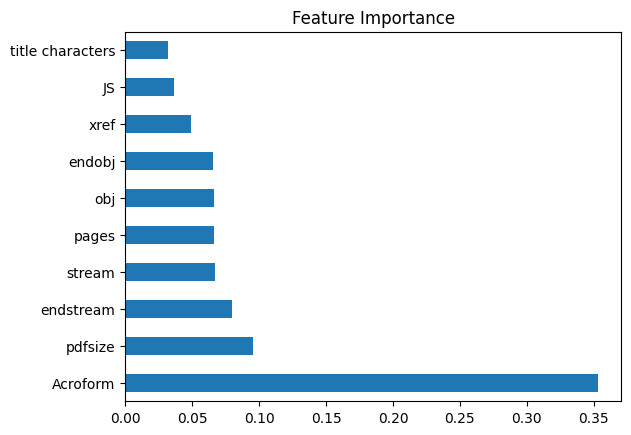

In [ ]:
X = df.drop(columns = ['class'])
y = df['class']


from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

## AVG Number of Acroforms by Class

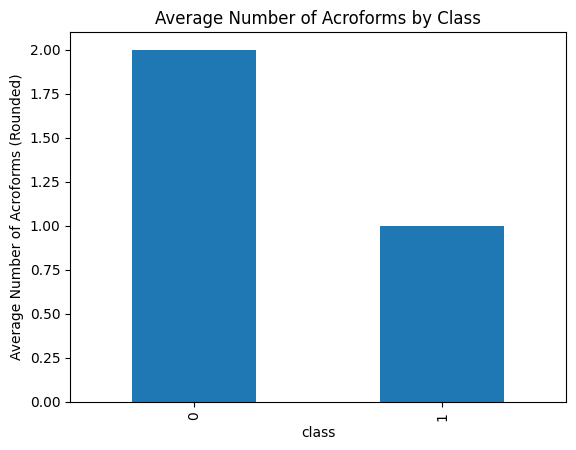

In [ ]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

numAcroformsbyTarget = df.groupby("class")["Acroform"].mean()
numAcroformsbyTarget = numAcroformsbyTarget.round()
numAcroformsbyTarget.plot(kind="bar")


plt.xlabel("class")
plt.ylabel("Average Number of Acroforms (Rounded)")
plt.title("Average Number of Acroforms by Class")
plt.show()

## AVG PDF Size by Class

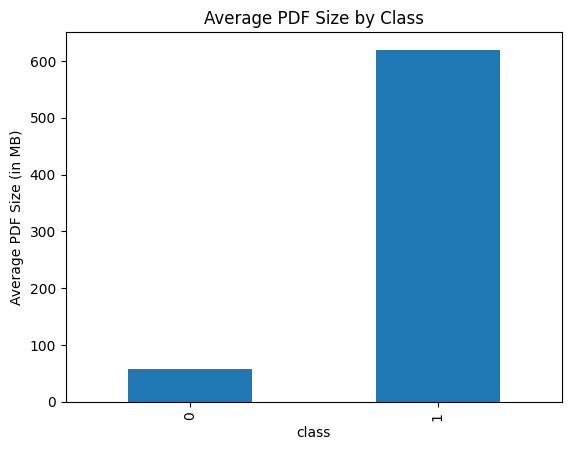

In [ ]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

numAcroformsbyTarget = df.groupby("class")["pdfsize"].mean()
numAcroformsbyTarget.plot(kind="bar")

plt.xlabel("class")
plt.ylabel("Average PDF Size (in MB)")
plt.title("Average PDF Size by Class")
plt.show()

##Distribution of Number of Images in PDF by Class (Benign)

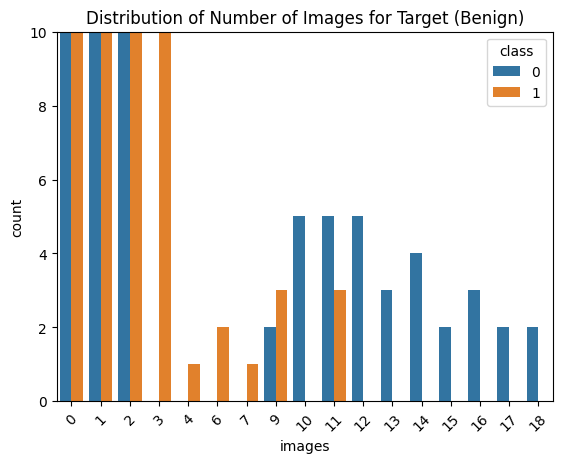

In [ ]:
sns.countplot(data=df, x='images', hue='class')
plt.xticks(rotation=45)
plt.title("Distribution of Number of Images for Target (Benign)")
plt.ylim(0, 10)

plt.show()

##Distribution of Number of Images in PDF by Class (Malicious)

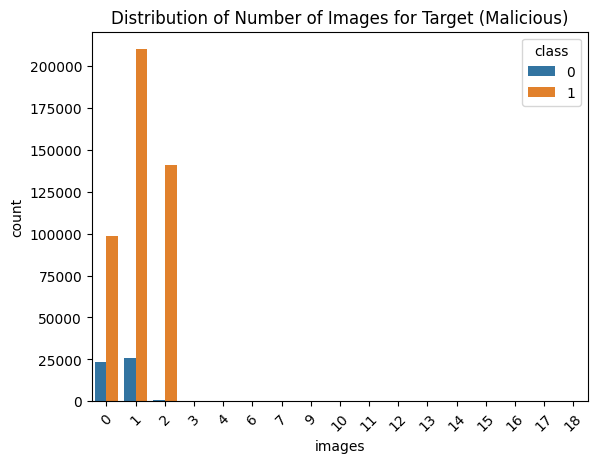

In [ ]:
sns.countplot(data=df, x='images', hue='class')
plt.xticks(rotation=45)
plt.title("Distribution of Number of Images for Target (Malicious)")

plt.show()

# Logistic Regression

In [ ]:
# Splitting the dataset
attr = df.drop(columns = ['class'])
target = df['class']
attr.head()
target.head()

0    Malicious
1    Malicious
2    Malicious
3    Malicious
4    Malicious
Name: class, dtype: object

In [ ]:
# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

categorical_columns = []

In [ ]:
scaler = StandardScaler()
attr_train_scaled = scaler.fit_transform(attr_train)
attr_test_scaled = scaler.transform(attr_test)


# instantiate classifier
logit = LogisticRegression(max_iter=2000)


# fit classifier to training set
logit.fit(attr_train_scaled,target_train)

# make predictions on test set
target_pred=logit.predict(attr_test_scaled)



# compute and print accuracy score
print('Accuracy: ')
print(accuracy_score(target_test, target_pred))
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy: 
0.9911266666666667
Classification Report
              precision    recall  f1-score   support

      Benign       0.96      0.95      0.96     15026
   Malicious       0.99      1.00      1.00    134974

    accuracy                           0.99    150000
   macro avg       0.98      0.97      0.98    150000
weighted avg       0.99      0.99      0.99    150000


Confusion Matrix
[[ 14298    728]
 [   603 134371]]


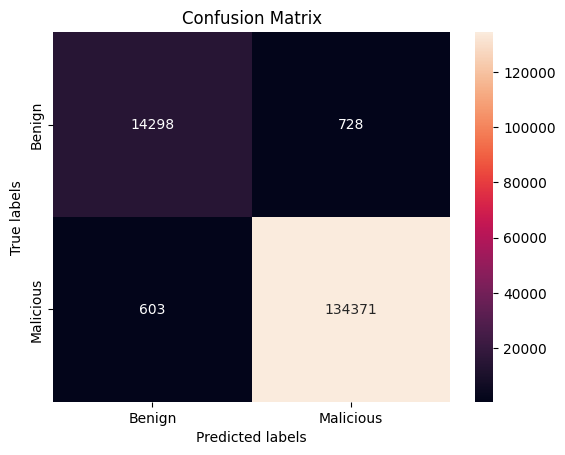

In [ ]:
cm = confusion_matrix(target_test, target_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Benign', 'Malicious'])
ax.yaxis.set_ticklabels(['Benign', 'Malicious'])
plt.show()

# Naive Bayes

In [ ]:
# Splitting the dataset
attr = df.drop(columns = ['class'])
target = df['class']
attr.head()
target.head()

attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 44, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

492070       Benign
474726       Benign
260713    Malicious
368273    Malicious
387759    Malicious
Name: class, dtype: object

In [ ]:
# Gaussian
GNB = GaussianNB()
GNB.fit(attr_train, target_train)
target_pred_gnb = GNB.predict(attr_test)
accuracy_gnb = accuracy_score(target_test, target_pred_gnb)
print(f'Accuracy of GaussianNB() model {accuracy_gnb}')
print('Classification Report for GaussianNB:')
print(classification_report(target_test, target_pred_gnb))
print('Confusion Matrix for GaussianNB:')
cm_gnb = confusion_matrix(target_test, target_pred_gnb)
print(cm_gnb)

Accuracy of GaussianNB() model 0.936664
Classification Report for GaussianNB:
              precision    recall  f1-score   support

      Benign       0.61      0.99      0.76     12496
   Malicious       1.00      0.93      0.96    112504

    accuracy                           0.94    125000
   macro avg       0.81      0.96      0.86    125000
weighted avg       0.96      0.94      0.94    125000

Confusion Matrix for GaussianNB:
[[ 12353    143]
 [  7774 104730]]


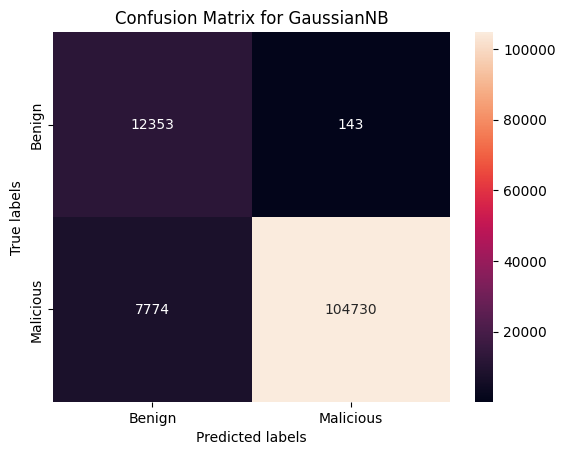

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(cm_gnb, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for GaussianNB')
ax.xaxis.set_ticklabels(['Benign', 'Malicious'])
ax.yaxis.set_ticklabels(['Benign', 'Malicious'])
plt.show()

In [ ]:
# Multinomial
MNB = MultinomialNB()
MNB.fit(attr_train, target_train)
target_pred_mnb = MNB.predict(attr_test)
accuracy_mnb = accuracy_score(target_test, target_pred_mnb)
print(f'Accuracy of MultinomialNB() model {accuracy_mnb}')
print('Classification Report for MultinomialNB:')
print(classification_report(target_test, target_pred_mnb))
print('Confusion Matrix for MultinomialNB:')
cm_mnb = confusion_matrix(target_test, target_pred_mnb)
print(cm_mnb)

Accuracy of MultinomialNB() model 0.917296
Classification Report for MultinomialNB:
              precision    recall  f1-score   support

      Benign       0.55      0.97      0.70     12496
   Malicious       1.00      0.91      0.95    112504

    accuracy                           0.92    125000
   macro avg       0.77      0.94      0.83    125000
weighted avg       0.95      0.92      0.93    125000

Confusion Matrix for MultinomialNB:
[[ 12160    336]
 [ 10002 102502]]


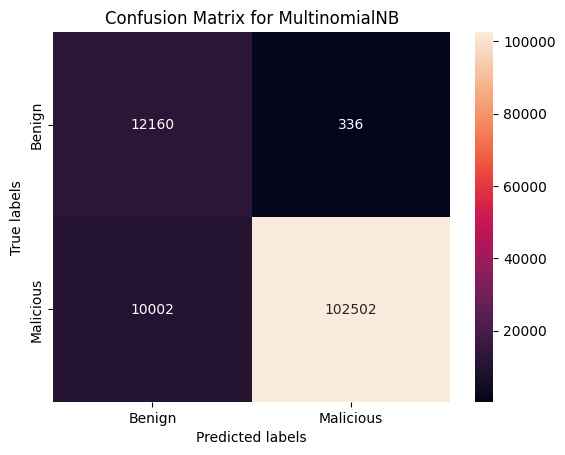

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(cm_mnb, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for MultinomialNB')
ax.xaxis.set_ticklabels(['Benign', 'Malicious'])
ax.yaxis.set_ticklabels(['Benign', 'Malicious'])
plt.show()

In [ ]:
# Categorical
CNB = CategoricalNB()
CNB.fit(attr_train, target_train)
target_pred_cnb = CNB.predict(attr_test)
accuracy_cnb = accuracy_score(target_test, target_pred_cnb)
print(f'Accuracy of CategoricalNB() model: {accuracy_cnb}')
print('Classification Report for CategoricalNB:')
print(classification_report(target_test, target_pred_cnb))
print('Confusion Matrix for CategoricalNB:')
cm_cnb = confusion_matrix(target_test, target_pred_cnb)
print(cm_cnb)

Accuracy of CategoricalNB() model: 0.975488
Classification Report for CategoricalNB:
              precision    recall  f1-score   support

      Benign       0.80      1.00      0.89     12496
   Malicious       1.00      0.97      0.99    112504

    accuracy                           0.98    125000
   macro avg       0.90      0.99      0.94    125000
weighted avg       0.98      0.98      0.98    125000

Confusion Matrix for CategoricalNB:
[[ 12495      1]
 [  3063 109441]]


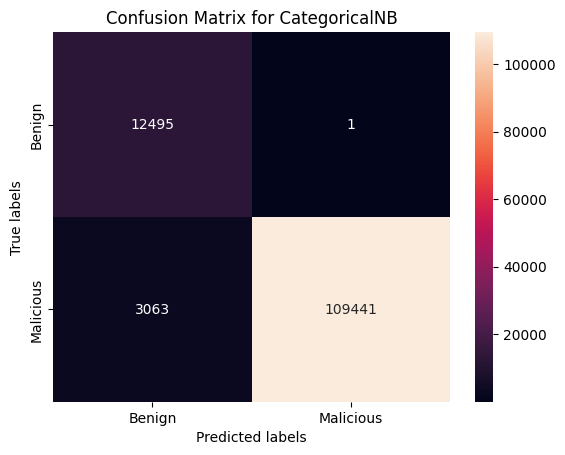

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(cm_cnb, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for CategoricalNB')
ax.xaxis.set_ticklabels(['Benign', 'Malicious'])
ax.yaxis.set_ticklabels(['Benign', 'Malicious'])
plt.show()

In [ ]:
# Bernoulli
BNB = BernoulliNB()
BNB.fit(attr_train, target_train)
target_pred_bnb = BNB.predict(attr_test)
accuracy_bnb = accuracy_score(target_test, target_pred_bnb)

print(f'Accuracy of BernoulliNB() model: {accuracy_bnb}')
print('Classification Report for BernoulliNB:')
print(classification_report(target_test, target_pred_bnb))
print('Confusion Matrix for BernoulliNB:')
cm_bnb = confusion_matrix(target_test, target_pred_bnb)
print(cm_bnb)

Accuracy of BernoulliNB() model: 0.956824
Classification Report for BernoulliNB:
              precision    recall  f1-score   support

      Benign       0.75      0.85      0.80     12496
   Malicious       0.98      0.97      0.98    112504

    accuracy                           0.96    125000
   macro avg       0.87      0.91      0.89    125000
weighted avg       0.96      0.96      0.96    125000

Confusion Matrix for BernoulliNB:
[[ 10654   1842]
 [  3555 108949]]


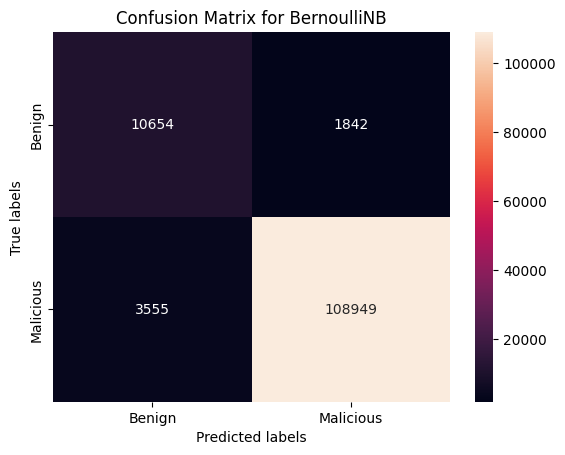

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(cm_bnb, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for BernoulliNB')
ax.xaxis.set_ticklabels(['Benign', 'Malicious'])
ax.yaxis.set_ticklabels(['Benign', 'Malicious'])
plt.show()

# KNN

In [ ]:
X = df.drop(columns = ['class'])
y = df['class']
X.head()
y.head()

0    Malicious
1    Malicious
2    Malicious
3    Malicious
4    Malicious
Name: class, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,startxref,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform
0,0.365878,0.243902,0.000000,0.055556,0.457895,0.461842,0.503937,0.503937,0.333333,0.333333,0.25,0.0,0.333333,0.0,0.2,0.0,1.0,0.0,0.5,0.0
1,0.367992,0.236934,0.000000,0.055556,0.457895,0.453947,0.488189,0.488189,0.333333,0.333333,0.25,0.0,0.333333,0.0,0.2,0.0,0.0,0.0,0.5,0.0
2,0.395508,0.236934,0.000000,0.055556,0.464474,0.464474,0.503937,0.492126,0.333333,0.333333,0.25,0.0,0.333333,0.0,0.2,0.0,0.0,0.0,0.5,0.0
3,0.406535,0.236934,0.000000,0.000000,0.998684,0.877632,0.984252,0.755906,0.333333,0.333333,0.25,0.0,0.333333,0.0,0.2,0.0,1.0,0.0,0.5,0.0
4,0.401525,0.243902,0.037453,0.111111,0.510526,0.490789,0.555118,0.543307,0.333333,0.333333,0.25,0.0,0.333333,0.0,0.2,0.0,1.0,0.0,0.5,0.0


In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size = 0.3, random_state = 4, shuffle = True)
y_train.head()
# attr_train.head()
y_test.head()

360430    Malicious
360250    Malicious
131875    Malicious
416314    Malicious
108442    Malicious
Name: class, dtype: object

In [ ]:
k_values = [3, 5, 10]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy of model with k = {k}: {accuracy}%')
  print('')

Accuracy of model with k = 3: 0.99772%

Accuracy of model with k = 5: 0.9976866666666667%

Accuracy of model with k = 10: 0.9973266666666667%



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Accuracy score')
print(accuracy_score(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))


Confusion Matrix
[[ 14807    135]
 [   266 134792]]

Accuracy score
0.9973266666666667

Classification Report
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99     14942
   Malicious       1.00      1.00      1.00    135058

    accuracy                           1.00    150000
   macro avg       0.99      0.99      0.99    150000
weighted avg       1.00      1.00      1.00    150000



[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malicious')]

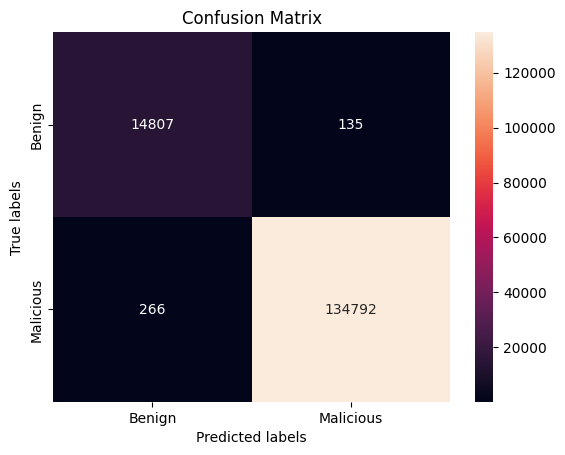

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malicious'])
ax.yaxis.set_ticklabels(['Benign', 'Malicious'])


#Random Forest

In [ ]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pdfsize           500000 non-null  float64
 1   pages             500000 non-null  int64  
 2   title characters  500000 non-null  int64  
 3   images            500000 non-null  int64  
 4   obj               500000 non-null  int64  
 5   endobj            500000 non-null  int64  
 6   stream            500000 non-null  int64  
 7   endstream         500000 non-null  int64  
 8   xref              500000 non-null  int64  
 9   trailer           500000 non-null  int64  
 10  startxref         500000 non-null  int64  
 11  ObjStm            500000 non-null  int64  
 12  JS                500000 non-null  int64  
 13  OBS_JS            500000 non-null  int64  
 14  Javascript        500000 non-null  int64  
 15  OBS_Javascript    500000 non-null  int64  
 16  OpenAction        50

In [ ]:
#df_obj= pd.get_dummies(df_obj, drop_first=True)
#print(df_obj['class'].value_counts())
#sns.countplot(data=df_obj, x='class')
#df_obj.head()
A = df.drop(columns=['class'],axis=1)
b = df['class']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=5)

In [ ]:
model = RandomForestClassifier(n_estimators=100,random_state=8)
model.fit(A_train,b_train)
b_pred = model.predict(A_test)


In [ ]:
print(f"Accuracy= {accuracy_score(b_test,b_pred)}")
cm = confusion_matrix(b_test,b_pred)
print(confusion_matrix(b_test,b_pred))
print(classification_report(b_test,b_pred))

Accuracy= 0.99932
[[ 14961     65]
 [    37 134937]]
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     15026
   Malicious       1.00      1.00      1.00    134974

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000



[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malicious')]

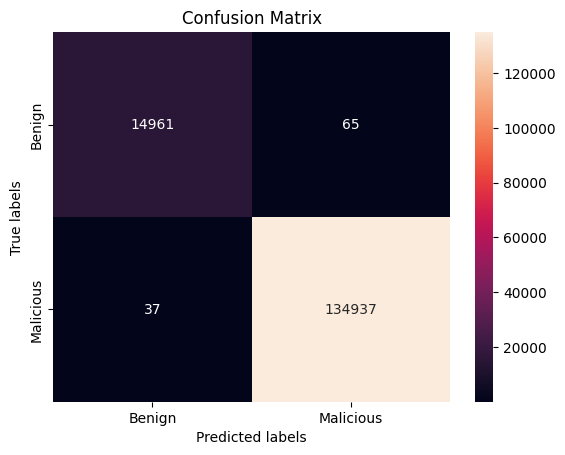

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malicious'])
ax.yaxis.set_ticklabels(['Benign', 'Malicious'])

In [ ]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Mean Decrease Accuracy[5.97033043e-02 1.31881441e-01 3.34726333e-02 2.04643794e-03
 7.30112275e-02 3.66478694e-02 1.10693467e-01 1.15531090e-01
 3.24687667e-02 5.93412074e-03 7.68922446e-03 3.86987839e-05
 1.73837384e-02 0.00000000e+00 2.47511020e-02 0.00000000e+00
 7.00541984e-03 0.00000000e+00 3.41741459e-01 0.00000000e+00]

Mean Decrease GINI= [1.07956905e-02 2.38471092e-02 6.05259948e-03 3.70041672e-04
 1.32020601e-02 6.62675306e-03 2.00158503e-02 2.08906007e-02
 5.87107798e-03 1.07302153e-03 1.39038347e-03 6.99760420e-06
 3.14336805e-03 0.00000000e+00 4.47555189e-03 0.00000000e+00
 1.26673633e-03 0.00000000e+00 6.17944862e-02 0.00000000e+00]


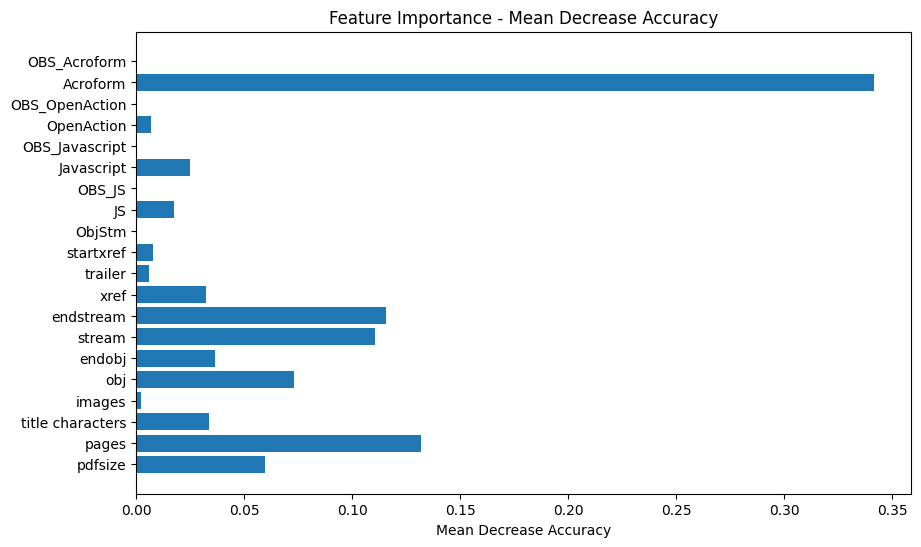

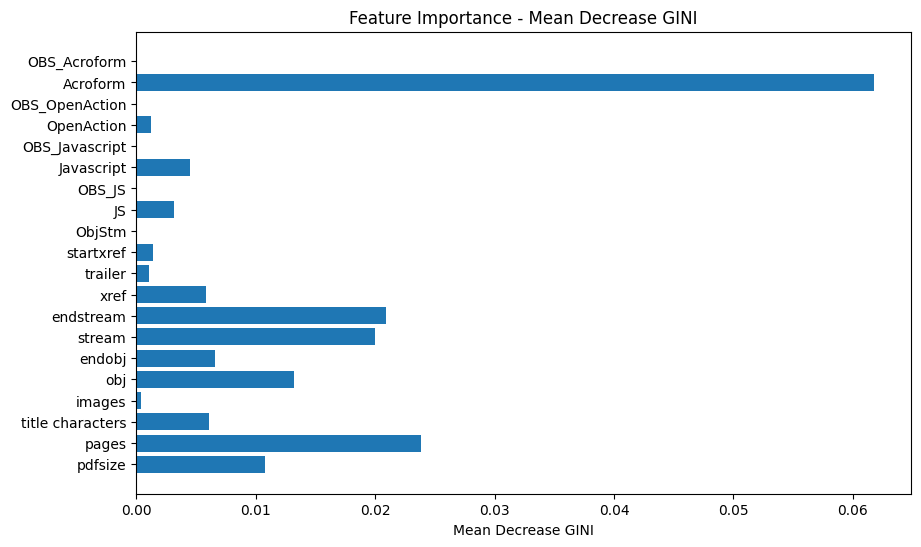

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), A.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), A.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=A.columns).sort_values(ascending=False)

print(feature_scores)

Acroform            0.341741
pages               0.131881
endstream           0.115531
stream              0.110693
obj                 0.073011
pdfsize             0.059703
endobj              0.036648
title characters    0.033473
xref                0.032469
Javascript          0.024751
JS                  0.017384
startxref           0.007689
OpenAction          0.007005
trailer             0.005934
images              0.002046
ObjStm              0.000039
OBS_JS              0.000000
OBS_Javascript      0.000000
OBS_OpenAction      0.000000
OBS_Acroform        0.000000
dtype: float64


In [ ]:
df.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,644.326,70,0,1,348,351,128,128,1,1,...,0,1,0,1,0,1,0,1,0,Malicious
1,648.050,68,0,1,348,345,124,124,1,1,...,0,1,0,1,0,0,0,1,0,Malicious
2,696.506,68,0,1,353,353,128,125,1,1,...,0,1,0,1,0,0,0,1,0,Malicious
3,715.926,68,0,0,759,667,250,192,1,1,...,0,1,0,1,0,1,0,1,0,Malicious
4,707.102,70,10,2,388,373,141,138,1,1,...,0,1,0,1,0,1,0,1,0,Malicious


# CART

In [ ]:
df.head()

X = df.iloc[:, 1:-1] # Features (excluding the 'class' column)
y = df['class']  # Target variable

# Splitting the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Implementing CART (Decision Tree)
cart = DecisionTreeClassifier(criterion='gini')
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting class for the test set
predict_dt = cart.predict(X_test)
print(len(predict_dt))
print(len(y_test))

150000
150000


In [ ]:
# Creating confusion matrix
conf_matrix = confusion_matrix(predict_dt, y_test)
print(conf_matrix)

[[ 14771    108]
 [   113 135008]]


In [ ]:
# Checking model accuracy
accuracy = accuracy_score(predict_dt, y_test)
print(accuracy)

0.9985266666666667


In [ ]:
# Error rate
error_rate = 1.0 - accuracy
print(error_rate)

predictions = cart.predict(X_test)

0.0014733333333333265


In [ ]:
# Evaluate Model (Model Accuracy, Conf. Matrix and Classification Report)

print("Accuracy:", accuracy_score(predict_dt, y_test))
print()
print("Confusion Matrix:\n", confusion_matrix(predict_dt, y_test))
print()
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.9985266666666667

Confusion Matrix:
 [[ 14771    108]
 [   113 135008]]

Classification Report:
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99     14884
   Malicious       1.00      1.00      1.00    135116

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000



# SVM

In [ ]:
df.head()

# Splitting the dataset into features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# Splitting the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Training
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Model Evaluation
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#Print Accuracy
print("Accuracy:", accuracy)
print()

#report, conf_matrix
print("Confusion Matrix:\n", conf_matrix)
print()
print("Classification Report:\n", report)
